# What is the fundamental idea behind Support Vector Machines?

Ans: It is a capable of performing linear and non-linear classification and regression and also good for dectecting outliers

# What is a support vector?

Ans: This are point that torches the margin or are located at the edge of the margin

# Why is it important to scale the inputs when using SVMs?

Ans: The major reason why we scale is so that it can be linearly separable

# Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

Ans: Yes it can outputa confidence score but can't output a probability score

# Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features? 
Ans: We should use a primal form when training on milions of instances nad hundreds of features

# Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?

Ans: We should increase gamma if we suspect that our model is underfitting the training set and increase C if we also suspect that our model is underfitting

# How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?

Ans:

# Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model

Ans:

          0         1
0  1.000000  0.962865
1  0.962865  1.000000
Training Score on both SVM and SGD: 0.8928571428571429 0.6517857142857143
Testing Score on both SVM and SDG: 0.8421052631578947 0.7105263157894737


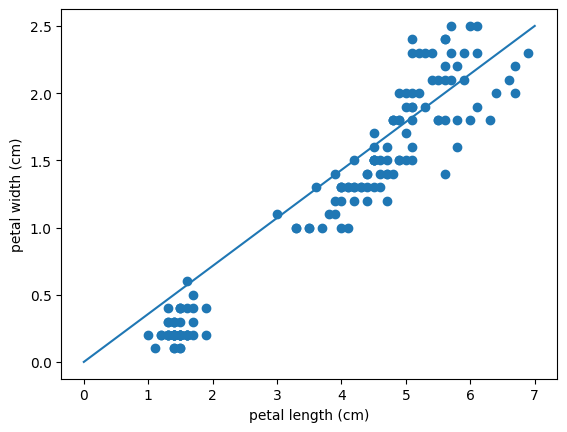

In [128]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

breast_cancer = datasets.load_iris()
breast_cancer.keys()
X = breast_cancer.data[: , [2,3]]
y = (breast_cancer.target == 1) # 'versicolor' 
plt.scatter(X[:,0], X[:,1])
plt.plot([0,7], [0,2.5])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
corr_matrix = pd.DataFrame(X).corr()
print(corr_matrix)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(X_scaled,y, shuffle=True, random_state=42)

sgd_clf = SGDClassifier(alpha=0.1, max_iter=1000,eta0=0.1,penalty='l2').fit(X_train,y_train)
svm_slf = LinearSVC(C=1,loss='hinge', dual=True, max_iter=1000).fit(X,y)
print("Training Score on both SVM and SGD: {} {}".format(svm_clf.score(X_train,y_train), sgd_clf.score(X_train, y_train)))
print("Testing Score on both SVM and SDG: {} {}".format(svm_clf.score(X_test, y_test), sgd_clf.score(X_test, y_test)))